## Introduction

# ![ITC Logo](https://storage.googleapis.com/kaggle-datasets-images/423609/807830/fc676eab839cc2a8134ac511f47e2c39/dataset-cover.jpg?t=2019-11-22-17-04-44)


This dataset contains historical stock market data for ITC Limited, a major Indian conglomerate. The dataset includes various attributes that help in analyzing the stock’s performance over time. Here is a rough breakdown of the columns and what they represent:

Dataset Columns:
- Date - The trading date.
- Symbol - The stock ticker (e.g., ITC).
- Series - The market segment (e.g., EQ for Equity).
- Prev Close - The previous day's closing price.
- Open - The opening price of the stock for that day.
- High - The highest price reached during the trading session.
- Low - The lowest price reached during the trading session.
- Last - The last traded price before market closure.
- Close - The official closing price.
- VWAP (Volume Weighted Average Price) - The average price weighted by volume.
- Volume - The total number of shares traded.
- Turnover - The total monetary value of shares traded.
- Trades - The number of trades executed.
- Deliverable Volume - The number of shares actually delivered.
- % Deliverable - The percentage of total volume that was deliverable.

##### 1. Importing the required libraries for EDA

In [119]:
#import libraries
!pip install ta
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import warnings

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

import ta 
warnings.filterwarnings('ignore')

In [8]:
df = pd.read_csv("ITC.csv")
df.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,ITC,EQ,656.00,694.00,708.50,675.0,708.50,708.50,701.81,562715,3.949174e+13,NaN,NaN,NaN
1,2000-01-04,ITC,EQ,708.50,714.00,729.00,694.3,710.65,712.35,714.16,712637,5.089379e+13,NaN,NaN,NaN
2,2000-01-05,ITC,EQ,712.35,716.25,758.90,660.0,731.00,726.20,732.43,1382149,1.012325e+14,NaN,NaN,NaN
3,2000-01-06,ITC,EQ,726.20,741.00,784.30,741.0,784.30,784.30,776.63,721618,5.604266e+13,NaN,NaN,NaN
4,2000-01-07,ITC,EQ,784.30,832.40,847.05,824.0,847.05,847.05,841.25,231209,1.945046e+13,NaN,NaN,NaN


In [9]:
df.tail()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5301,2021-04-26,ITC,EQ,205.35,205.8,206.75,204.70,205.50,205.3,205.64,19886214,4.089370e+14,103777.0,11449231.0,0.5757
5302,2021-04-27,ITC,EQ,205.30,205.3,206.95,205.05,205.50,205.4,205.85,11444814,2.355887e+14,94890.0,4863874.0,0.4250
5303,2021-04-28,ITC,EQ,205.40,206.0,206.50,205.30,205.65,205.5,205.96,12708021,2.617327e+14,69476.0,7221020.0,0.5682
5304,2021-04-29,ITC,EQ,205.50,207.1,207.55,204.05,204.40,204.3,205.37,13096755,2.689642e+14,95800.0,5887019.0,0.4495
5305,2021-04-30,ITC,EQ,204.30,203.9,205.70,202.00,202.40,202.6,203.73,16495657,3.360649e+14,124300.0,8268973.0,0.5013


##### 2. Statistical Analysis

In [11]:
df.shape

(5306, 15)

There is a total 5306 rows and 15 columns in the dataset.

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5306 entries, 0 to 5305
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Date                5306 non-null   object 
 1   Symbol              5306 non-null   object 
 2   Series              5306 non-null   object 
 3   Prev Close          5306 non-null   float64
 4   Open                5306 non-null   float64
 5   High                5306 non-null   float64
 6   Low                 5306 non-null   float64
 7   Last                5306 non-null   float64
 8   Close               5306 non-null   float64
 9   VWAP                5306 non-null   float64
 10  Volume              5306 non-null   int64  
 11  Turnover            5306 non-null   float64
 12  Trades              2456 non-null   float64
 13  Deliverable Volume  4792 non-null   float64
 14  %Deliverble         4792 non-null   float64
dtypes: float64(11), int64(1), object(3)
memory usage: 621.9

In [14]:
df.isnull().sum()

Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2850
Deliverable Volume     514
%Deliverble            514
dtype: int64

This dataset contains some null values in the Trades and Deliverable Volume columns.

In [16]:
df.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5306.000000,5.306000e+03,5.306000e+03,2456.000000,4.792000e+03,4792.000000
mean,420.359141,420.631511,426.629061,414.241538,420.250207,420.273690,420.522927,7.173165e+06,1.799399e+14,94563.757736,4.571758e+06,0.591634
std,328.167744,328.240059,333.333043,323.333442,328.107927,328.165405,328.435808,9.613497e+06,2.155242e+14,59571.722457,5.040517e+06,0.128273
min,115.450000,115.000000,116.200000,114.400000,115.500000,115.450000,115.390000,6.797000e+03,5.340132e+11,1425.000000,6.120000e+03,0.098000
25%,201.650000,202.000000,204.500000,198.500000,201.500000,201.650000,201.705000,1.038020e+06,5.423007e+13,56465.250000,1.614865e+06,0.515700
50%,280.050000,280.200000,283.000000,277.025000,279.900000,280.025000,280.055000,5.122630e+06,1.222452e+14,80494.500000,3.569193e+06,0.611650
75%,631.875000,630.975000,640.000000,623.500000,631.150000,631.362500,631.727500,8.788539e+06,2.315038e+14,113228.000000,6.023117e+06,0.685625
max,1940.100000,1946.000000,1964.800000,1916.300000,1940.000000,1940.100000,1933.790000,1.494797e+08,4.254992e+15,667965.000000,8.629348e+07,0.997300


In [17]:
# Check if null values in Deliverable Volume and %Deliverble are in same rows
deliv_vol_null = df[df['Deliverable Volume'].isnull()]
deliv_pct_null = df[df['%Deliverble'].isnull()]

print("Number of null values in Deliverable Volume:", len(deliv_vol_null))
print("Number of null values in %Deliverble:", len(deliv_pct_null))
print("\nAre they the same rows?", deliv_vol_null.index.equals(deliv_pct_null.index))

# Display first few rows where either column is null to verify
print("\nSample rows with null values:")
print(df[df['Deliverable Volume'].isnull() | df['%Deliverble'].isnull()].head())


Number of null values in Deliverable Volume: 514
Number of null values in %Deliverble: 514

Are they the same rows? True

Sample rows with null values:
         Date Symbol Series  Prev Close    Open    High    Low    Last  \
0  2000-01-03    ITC     EQ      656.00  694.00  708.50  675.0  708.50   
1  2000-01-04    ITC     EQ      708.50  714.00  729.00  694.3  710.65   
2  2000-01-05    ITC     EQ      712.35  716.25  758.90  660.0  731.00   
3  2000-01-06    ITC     EQ      726.20  741.00  784.30  741.0  784.30   
4  2000-01-07    ITC     EQ      784.30  832.40  847.05  824.0  847.05   

    Close    VWAP   Volume      Turnover  Trades  Deliverable Volume  \
0  708.50  701.81   562715  3.949174e+13     NaN                 NaN   
1  712.35  714.16   712637  5.089379e+13     NaN                 NaN   
2  726.20  732.43  1382149  1.012325e+14     NaN                 NaN   
3  784.30  776.63   721618  5.604266e+13     NaN                 NaN   
4  847.05  841.25   231209  1.945046e+13   

Here we find both columns are having null values in same rows.

So we drop those rows.

##### 3. Data Cleaning

In [21]:
df.dropna(subset=['Deliverable Volume', '%Deliverble'], inplace=True)
df.isnull().sum()


Date                     0
Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2336
Deliverable Volume       0
%Deliverble              0
dtype: int64

For the Trades column, we find sutiable replacement for null values using statistical measures.


In [23]:
df_tre_mean = df['Trades'].mean()
df_tre_median = df['Trades'].median()  
df_tre_mode = df['Trades'].mode()
df_tre_mean 



94563.75773615635

In [24]:
df_tre_median

80494.5

In [25]:
df.fillna(df['Trades'].median(), inplace=True)
df.isnull().sum()


Date                  0
Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

We fill the null values with median of the column.


In [27]:
df.sample(5)

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
5144,2020-09-04,ITC,EQ,191.60,190.00,190.00,185.70,187.25,186.70,187.59,41389121,7.764152e+14,227442.0,21359144.0,0.5161
1843,2007-05-10,ITC,EQ,160.70,163.90,167.15,160.65,163.30,163.70,164.98,6044458,9.972417e+13,80494.5,3432607.0,0.5679
4611,2018-07-06,ITC,EQ,272.50,272.75,274.75,270.15,271.75,272.65,272.52,12936762,3.525494e+14,94852.0,6759168.0,0.5225
528,2002-02-12,ITC,EQ,714.35,710.00,711.90,701.00,701.25,703.00,705.39,76179,5.373611e+12,80494.5,18234.0,0.2394
887,2003-07-21,ITC,EQ,744.90,730.00,750.00,721.25,722.25,726.70,735.22,149878,1.101936e+13,80494.5,70469.0,0.4702


In [28]:
df['Trades'] = df['Trades'].astype(int)
df['Deliverable Volume'] = df['Deliverable Volume'].astype(int)
df['%Deliverble'] = df['%Deliverble'].astype(float)


Convert the Trades, Deliverable Volume and %Deliverble columns to integer and float respectively.


In [30]:
# Convert Turnover from scientific notation to billions and rename column
df['Turnover_Billions'] = df['Turnover'] / 1e9
df = df.drop('Turnover', axis=1)


We did some feature engineering to convert the Turnover column to billions and drop the Turnover column and drop the Symbol and Series columns since they are constant.


In [32]:
# Remove Symbol and Series columns since they are constant
df = df.drop(['Symbol', 'Series'], axis=1)


In [33]:
df

,Date,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble,Turnover_Billions
498,2002-01-01,677.60,678.0,694.00,676.00,683.05,684.05,684.63,176918,80494,76049,0.4299,12112.348775
499,2002-01-02,684.05,690.0,710.00,688.90,707.95,707.40,700.19,471570,80494,125582,0.2663,33018.950595
500,2002-01-03,707.40,710.0,715.00,702.20,709.00,707.75,708.12,216295,80494,71801,0.3320,15316.252250
501,2002-01-04,707.75,710.0,718.75,702.00,707.10,706.90,711.80,249829,80494,127506,0.5104,17782.713310
502,2002-01-07,706.90,712.0,719.00,706.10,706.30,711.65,713.08,223457,80494,115009,0.5147,15934.243085
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,205.35,205.8,206.75,204.70,205.50,205.30,205.64,19886214,103777,11449231,0.5757,408936.959650
5302,2021-04-27,205.30,205.3,206.95,205.05,205.50,205.40,205.85,11444814,94890,4863874,0.4250,235588.668785
5303,2021-04-28,205.40,206.0,206.50,205.30,205.65,205.50,205.96,12708021,69476,7221020,0.5682,261732.731275
5304,2021-04-29,205.50,207.1,207.55,204.05,204.40,204.30,205.37,13096755,95800,5887019,0.4495,268964.176180


In [34]:
df.describe()


,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble,Turnover_Billions
count,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4792.000000,4.792000e+03,4792.000000,4.792000e+03,4792.000000,4.792000e+03
mean,384.500866,384.918625,389.900783,379.634714,384.735006,384.767070,384.847844,7.846892e+06,87705.044449,4.571758e+06,0.591634,1.929437e+05
std,323.326772,323.863381,328.390286,319.685689,323.970943,324.054209,324.150723,9.864895e+06,43219.633447,5.040517e+06,0.128273,2.222265e+05
min,115.450000,115.000000,116.200000,114.400000,115.500000,115.450000,115.390000,2.859200e+04,1425.000000,6.120000e+03,0.098000,2.453032e+03
25%,196.687500,197.087500,200.000000,193.637500,196.637500,196.700000,196.947500,2.813436e+06,79017.000000,1.614865e+06,0.515700,6.531728e+04
50%,268.075000,268.000000,270.700000,265.575000,267.950000,268.075000,268.005000,5.683416e+06,80494.000000,3.569193e+06,0.611650,1.373690e+05
75%,344.700000,345.275000,349.200000,341.037500,345.000000,344.700000,344.642500,9.260206e+06,81643.000000,6.023117e+06,0.685625,2.437159e+05
max,1940.100000,1946.000000,1964.800000,1916.300000,1940.000000,1940.100000,1933.790000,1.494797e+08,667965.000000,8.629348e+07,0.997300,4.254992e+06


##### 4. Data Visualization

In [36]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set Date as index
df.set_index('Date', inplace=True)

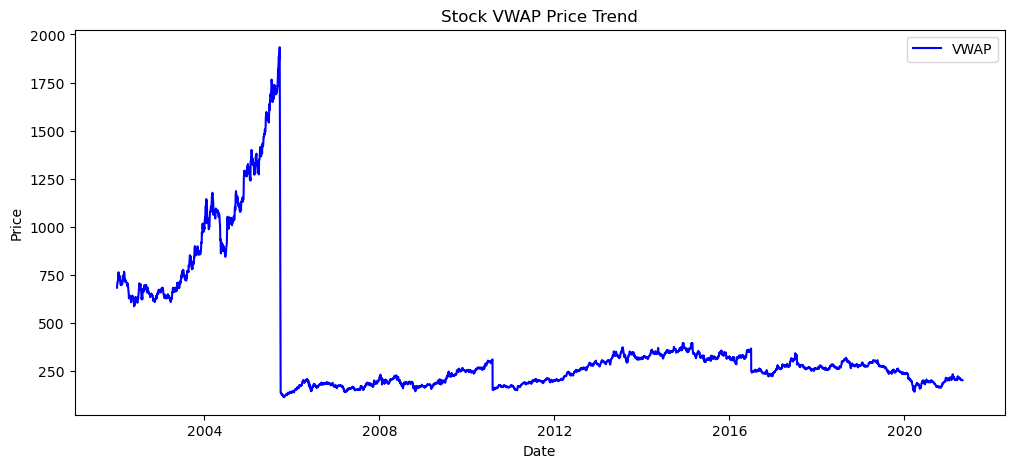

In [37]:
# Plot VWAP Price Trend
plt.figure(figsize=(12,5))
plt.plot(df['VWAP'], label="VWAP", color='blue')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock VWAP Price Trend')
plt.legend()
plt.show()


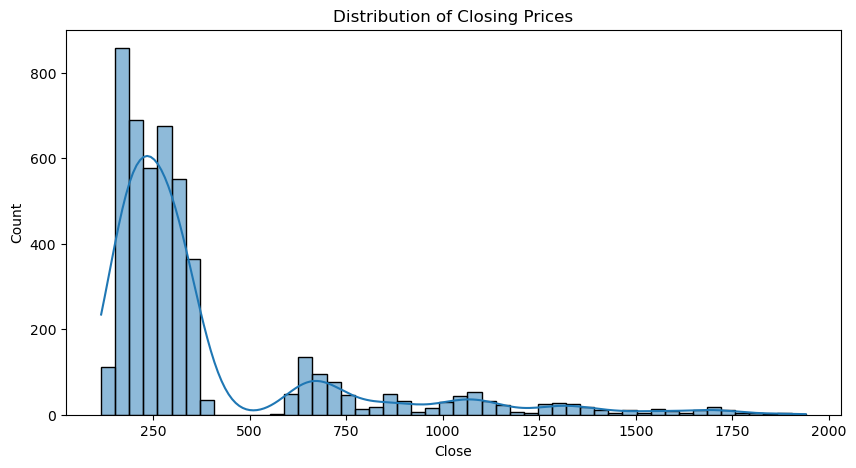

In [38]:
plt.figure(figsize=(10,5))
sns.histplot(df['Close'], bins=50, kde=True)
plt.title('Distribution of Closing Prices')
plt.show()

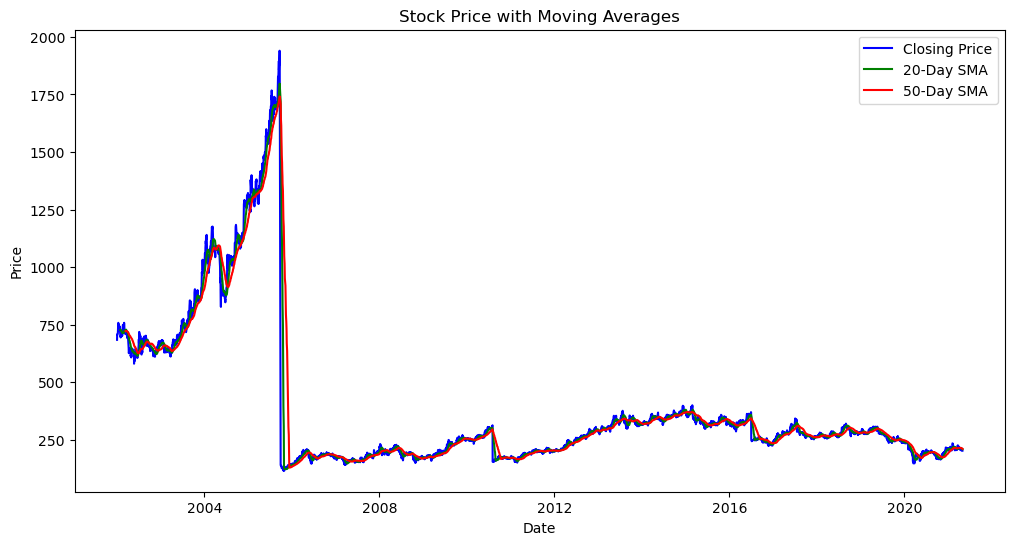

In [39]:
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()

# Plot moving averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label="Closing Price", color='blue')
plt.plot(df['SMA_20'], label="20-Day SMA", color='green')
plt.plot(df['SMA_50'], label="50-Day SMA", color='red')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Stock Price with Moving Averages')
plt.legend()
plt.show()


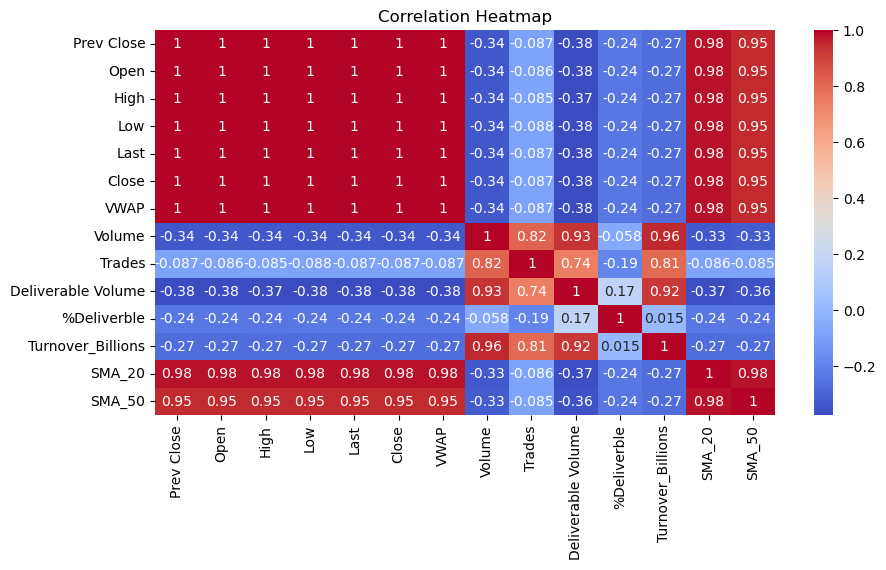

In [40]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

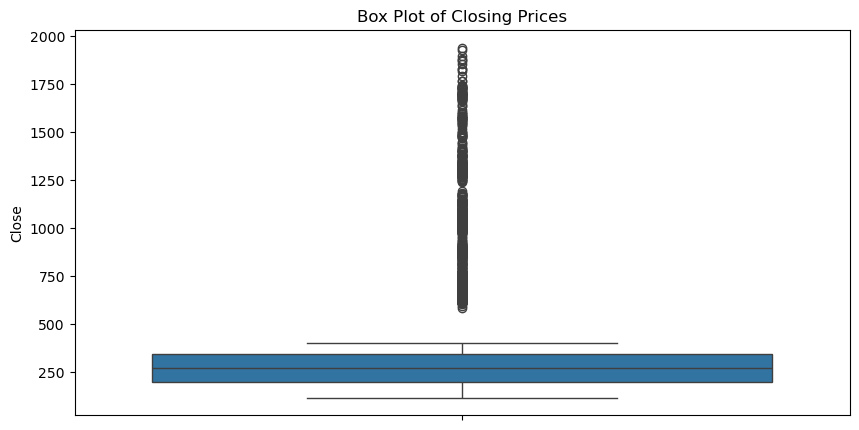

In [41]:
plt.figure(figsize=(10,5))
sns.boxplot(df['Close'])
plt.title('Box Plot of Closing Prices')
plt.show()


In [42]:
df

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Trades,Deliverable Volume,%Deliverble,Turnover_Billions,SMA_20,SMA_50
Date,,,,,,,,,,,,,,
2002-01-01,677.60,678.0,694.00,676.00,683.05,684.05,684.63,176918,80494,76049,0.4299,12112.348775,NaN,NaN
2002-01-02,684.05,690.0,710.00,688.90,707.95,707.40,700.19,471570,80494,125582,0.2663,33018.950595,NaN,NaN
2002-01-03,707.40,710.0,715.00,702.20,709.00,707.75,708.12,216295,80494,71801,0.3320,15316.252250,NaN,NaN
2002-01-04,707.75,710.0,718.75,702.00,707.10,706.90,711.80,249829,80494,127506,0.5104,17782.713310,NaN,NaN
2002-01-07,706.90,712.0,719.00,706.10,706.30,711.65,713.08,223457,80494,115009,0.5147,15934.243085,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,205.35,205.8,206.75,204.70,205.50,205.30,205.64,19886214,103777,11449231,0.5757,408936.959650,210.5625,212.474
2021-04-27,205.30,205.3,206.95,205.05,205.50,205.40,205.85,11444814,94890,4863874,0.4250,235588.668785,210.0350,212.002
2021-04-28,205.40,206.0,206.50,205.30,205.65,205.50,205.96,12708021,69476,7221020,0.5682,261732.731275,209.7300,211.561


In [43]:
# Find highest High and lowest Low
highest_high = df['High'].max()
lowest_low = df['Low'].min()

print(f"Highest High: {highest_high}")
print(f"Lowest Low: {lowest_low}")


Highest High: 1964.8
Lowest Low: 114.4


In [44]:
# Find dates of highest high and lowest low
highest_high_date = df[df['High'] == highest_high].index[0]
lowest_low_date = df[df['Low'] == lowest_low].index[0]

# Calculate time difference
time_diff = abs(highest_high_date - lowest_low_date)

print(f"\nDate of Highest High ({highest_high}): {highest_high_date}")
print(f"Date of Lowest Low ({lowest_low}): {lowest_low_date}")
print(f"\nTime between Highest High and Lowest Low: {time_diff}")



Date of Highest High (1964.8): 2005-09-20 00:00:00
Date of Lowest Low (114.4): 2005-10-28 00:00:00

Time between Highest High and Lowest Low: 38 days 00:00:00


Between September 20, 2005, and October 28, 2005, ITC Limited's share price experienced a significant decline from a high of ₹1964.8 to a low of ₹114.4. This sharp decrease was primarily due to a stock split and a bonus issue implemented by the company during that period.

Stock Split Details:

Date: September 21, 2005
Ratio: 1:10
Description: The face value of ITC's shares was reduced from ₹10 to ₹1, effectively increasing the number of shares tenfold and proportionally reducing the share price by the same factor. 

Bonus Issue Details:

Date: September 2005
Ratio: 1:2
Description: Shareholders received one additional share for every two shares held, further increasing the number of shares and adjusting the share price accordingly.

These corporate actions were designed to enhance the stock's liquidity and make it more affordable for a broader range of investors. The apparent drop in share price reflects these adjustments and does not indicate a loss in the company's market value.

Source: https://companiesmarketcap.com/itc/stock-splits/?utm_source=chatgpt.com , https://www.equitymaster.com/detail.asp?date=10%2F07%2F2024&story=6&title=5-Things-ITC-Shareholders-Should-Know-as-ITC-Hotels-Gets-Demerger-Approval&utm_source=chatgpt.com

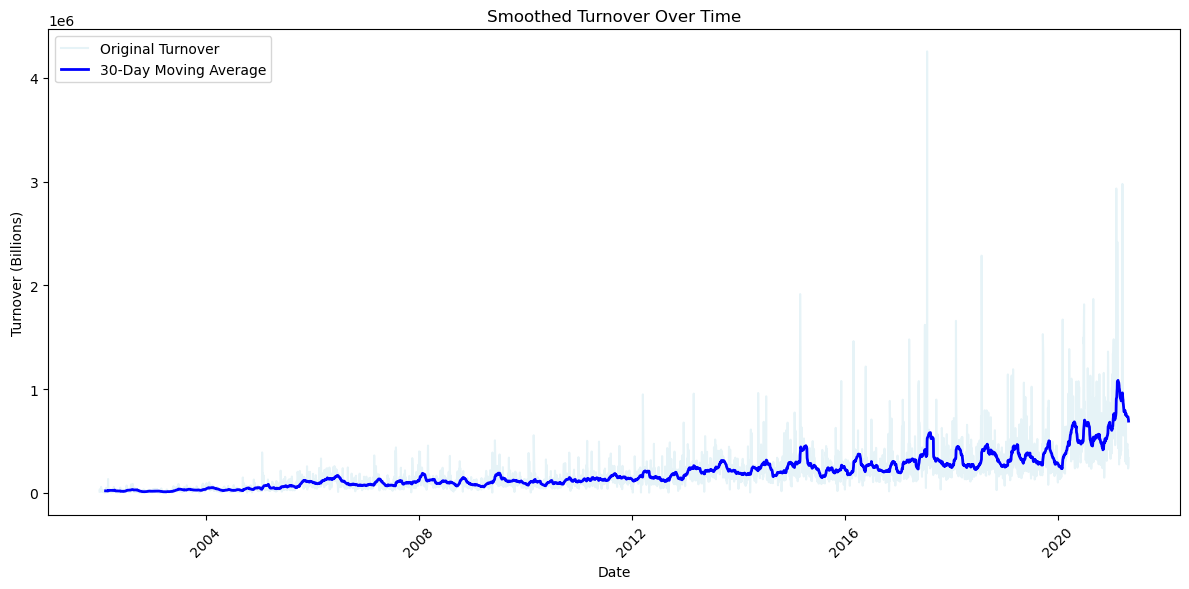

In [46]:
# Create a figure showing turnover over time with smoothing
plt.figure(figsize=(12,6))

# Calculate rolling average for smoothing (30 day window)
rolling_avg = df['Turnover_Billions'].rolling(window=30).mean()

# Plot original turnover as light line
plt.plot(df.index, df['Turnover_Billions'], color='lightblue', alpha=0.3, label='Original Turnover')

# Plot smoothed turnover line
plt.plot(df.index, rolling_avg, color='blue', linewidth=2, label='30-Day Moving Average')

# Customize the plot
plt.title('Smoothed Turnover Over Time')
plt.xlabel('Date')
plt.ylabel('Turnover (Billions)')

# Add legend
plt.legend(loc='upper left')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


Found 89 instances of 3 consecutive days
where VWAP increased by at least 1.0% each day



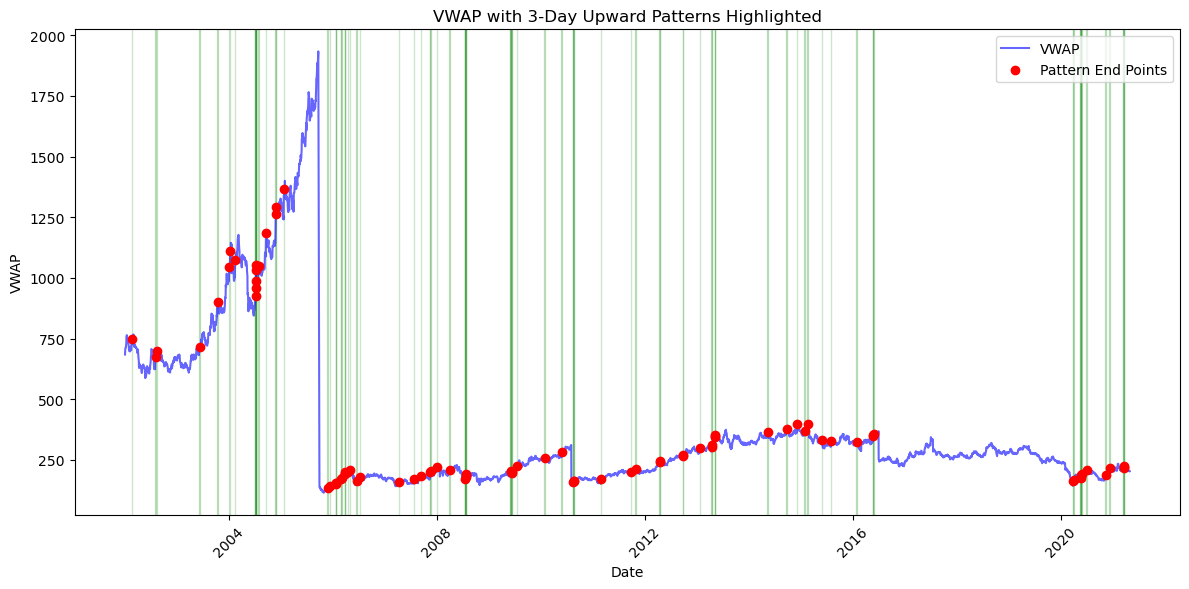

In [47]:
# Calculate daily VWAP changes
df['VWAP_Change'] = df['VWAP'].pct_change()

# Define what constitutes an upward pattern (e.g. consecutive days of increase)
consecutive_days = 3  # Looking for 3 consecutive days of increase
threshold = 0.01  # 1% minimum increase per day

# Find dates where VWAP increased consecutively
upward_patterns = []
for i in range(consecutive_days, len(df)):
    # Check if we have consecutive days of increase above threshold
    is_pattern = True
    for j in range(consecutive_days):
        if df['VWAP_Change'].iloc[i-j] < threshold:
            is_pattern = False
            break
    if is_pattern:
        upward_patterns.append(df.index[i])

print(f"\nFound {len(upward_patterns)} instances of {consecutive_days} consecutive days")
print(f"where VWAP increased by at least {threshold*100}% each day\n")

if len(upward_patterns) > 0:
    
    for date in upward_patterns[:5]:  # Show first 5 patterns
        pattern_slice = df.loc[date - pd.Timedelta(days=consecutive_days):date]
        

# Create plot
plt.figure(figsize=(12,6))

# Plot VWAP
plt.plot(df.index, df['VWAP'], label='VWAP', color='blue', alpha=0.6)

# Highlight pattern regions
for date in upward_patterns:
    pattern_start = date - pd.Timedelta(days=consecutive_days)
    pattern_end = date
    plt.axvspan(pattern_start, pattern_end, color='green', alpha=0.2)

# Add markers at pattern end points
pattern_dates = [date for date in upward_patterns]
pattern_values = [df.loc[date, 'VWAP'] for date in upward_patterns]
plt.scatter(pattern_dates, pattern_values, color='red', zorder=5, label='Pattern End Points')

plt.title(f'VWAP with {consecutive_days}-Day Upward Patterns Highlighted')
plt.xlabel('Date')
plt.ylabel('VWAP')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


 Pattern Analysis Results
 The graph shows VWAP (Volume Weighted Average Price) trends for ITC stock from 2002-2021
 - Blue line represents the VWAP over time
 - Green shaded regions highlight periods of 3 consecutive days of VWAP increase (>1% each day)
 - Red dots mark the end points of each upward pattern
 - Notable patterns of strong upward movement seen especially in early 2000s
 - VWAP shows overall stability in recent years (2015-2021) with occasional upward patterns
 - Total of 89 instances of 3-day upward patterns identified


## Conclusion
 This analysis examines ITC equity stock data from 2002 to 2021, focusing on several key aspects:

Data Overview:
- Analysis period: 2002-01-01 to 2021-04-30
- Total trading days analyzed: 4792

Price Statistics:
- Average VWAP: ₹384.85
- Highest VWAP: ₹1933.79
- Lowest VWAP: ₹115.39

Volume Statistics:
- Average daily volume: 7,846,892 shares
- Average deliverable percentage: 59.2%

Pattern Analysis:
- Found 89 instances of 3 consecutive days
  where VWAP increased by at least 1.0% each day

Trading Activity:
- Average number of daily trades: 87,705
- Average daily turnover: ₹192,943.73 billion

Key Observations:
- The stock shows significant price movement over the analyzed period
- Multiple instances of consecutive upward price movements were identified
- Trading volumes and delivery percentages indicate active market participation
- The analysis reveals both long-term trends and short-term price patterns


==== Logistic Regression ====
Accuracy: 0.4654471544715447
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       263
           1       0.47      1.00      0.64       229

    accuracy                           0.47       492
   macro avg       0.23      0.50      0.32       492
weighted avg       0.22      0.47      0.30       492

Confusion Matrix:
 [[  0 263]
 [  0 229]]

==== Decision Tree ====
Accuracy: 0.49390243902439024
              precision    recall  f1-score   support

           0       0.53      0.51      0.52       263
           1       0.46      0.48      0.47       229

    accuracy                           0.49       492
   macro avg       0.49      0.49      0.49       492
weighted avg       0.50      0.49      0.49       492

Confusion Matrix:
 [[133 130]
 [119 110]]

==== Random Forest ====
Accuracy: 0.49796747967479676
              precision    recall  f1-score   support

           0       0.57      0.24     

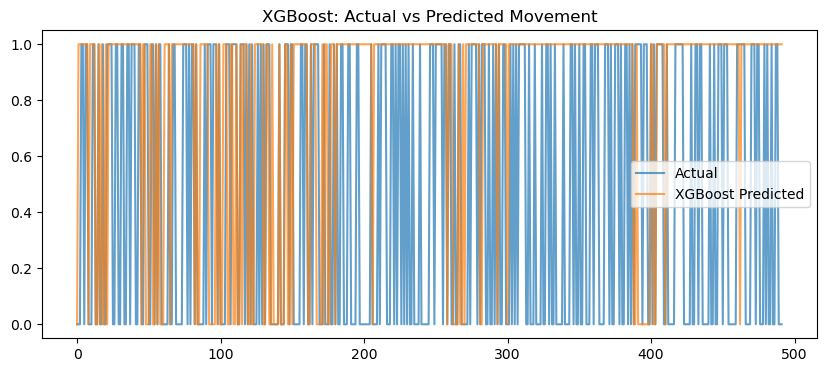

In [109]:
# 1. Import Libraries (extend with technical analysis and XGBoost)
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

# 3. Feature Engineering: Add Technical Indicators
df['SMA_20'] = df['Close'].rolling(window=20).mean()
df['SMA_50'] = df['Close'].rolling(window=50).mean()
df['Return_1d'] = df['Close'].pct_change()
df['Volatility_5d'] = df['Return_1d'].rolling(window=5).std()

# Add RSI
df['RSI'] = ta.momentum.RSIIndicator(df['Close'], window=14).rsi()

# Add MACD
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()

# Add Bollinger Bands
bollinger = ta.volatility.BollingerBands(df['Close'])
df['BB_high'] = bollinger.bollinger_hband()
df['BB_low'] = bollinger.bollinger_lband()

# Add Lag Features
df['Close_lag1'] = df['Close'].shift(1)
df['Close_lag2'] = df['Close'].shift(2)
df['Close_lag3'] = df['Close'].shift(3)

# 4. Target variable (Up = 1, Down = 0)
df['Target'] = (df['Close'].shift(-1) > df['Close']).astype(int)

# Drop rows with NaN values from rolling and lag features
df = df.dropna()

# 5. Select features including your columns and added indicators
feature_cols = [
    'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP', 'Volume',
    'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble',
    'SMA_20', 'SMA_50', 'Return_1d', 'Volatility_5d',
    'RSI', 'MACD', 'MACD_signal', 'BB_high', 'BB_low',
    'Close_lag1', 'Close_lag2', 'Close_lag3'
]

X = df[feature_cols]
y = df['Target']

# 6. Train-test split without shuffling (time series)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 7. Train models

# Logistic Regression
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# XGBoost
xgb_model = xgb.XGBClassifier(n_estimators=300, max_depth=5, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

# 8. Evaluation printout
print("==== Logistic Regression ====")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

print("\n==== Decision Tree ====")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))

print("\n==== Random Forest ====")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))

print("\n==== XGBoost ====")
print("Accuracy:", accuracy_score(y_test, y_pred_xgb))
print(classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))

# 9. Summary table of accuracies
results = {
    'Logistic Regression': accuracy_score(y_test, y_pred_lr),
    'Decision Tree': accuracy_score(y_test, y_pred_dt),
    'Random Forest': accuracy_score(y_test, y_pred_rf),
    'XGBoost': accuracy_score(y_test, y_pred_xgb)
}

results_df = pd.DataFrame(list(results.items()), columns=['Model', 'Accuracy'])
print("\nModel Comparison:\n", results_df.sort_values('Accuracy', ascending=False))

# 10. Optional: Plot predicted vs actual for best model (XGBoost here)
plt.figure(figsize=(10,4))
plt.plot(y_test.values, label='Actual', alpha=0.7)
plt.plot(y_pred_xgb, label='XGBoost Predicted', alpha=0.7)
plt.title('XGBoost: Actual vs Predicted Movement')
plt.legend()
plt.show()


               Model        MAE        RMSE  R2 Score
2      Random Forest  18.908050   23.031365  0.702532
3            XGBoost  18.845461   23.453982  0.691515
1      Decision Tree  22.376000   32.012273  0.425309
0  Linear Regression  90.789784  121.362035 -7.259751


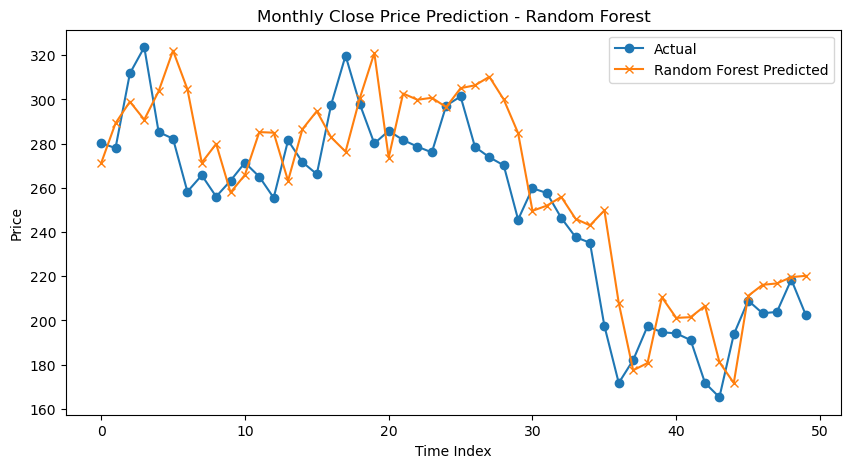

In [121]:
# ===== Imports =====
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# ===== Store results =====
results = []

def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    mae = mean_absolute_error(y_test, preds)
    rmse = np.sqrt(mean_squared_error(y_test, preds))
    r2 = r2_score(y_test, preds)
    results.append({
        'Model': name,
        'MAE': mae,
        'RMSE': rmse,
        'R2 Score': r2
    })
    return mae, rmse, r2, preds

# ===== Train & Evaluate Multiple Models =====

# 1. Linear Regression
evaluate_model("Linear Regression", LinearRegression(),
               X_train, y_train, X_test, y_test)

# 2. Decision Tree
evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42),
               X_train, y_train, X_test, y_test)

# 3. Random Forest
mae_rf, rmse_rf, r2_rf, y_pred_rf = evaluate_model(
    "Random Forest", RandomForestRegressor(n_estimators=200, random_state=42),
    X_train, y_train, X_test, y_test
)

# 4. XGBoost
evaluate_model("XGBoost", xgb.XGBRegressor(n_estimators=300,
                                           max_depth=5,
                                           learning_rate=0.05,
                                           random_state=42),
               X_train, y_train, X_test, y_test)

# ===== Create Comparison Table =====
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2 Score", ascending=False))

# ===== Optional: Plot best model predictions =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(y_test.values, label="Actual", marker='o')
plt.plot(y_pred_rf, label="Random Forest Predicted", marker='x')
plt.title("Monthly Close Price Prediction - Random Forest")
plt.xlabel("Time Index")
plt.ylabel("Price")
plt.legend()
plt.show()
